# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [5]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import urllib
import json

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy


### Generate the Cities List by Using the `citipy` Library

In [6]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 601


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [7]:

# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}q={city}&units=metric&appid={weather_api_key}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather =  requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | anadyr
Processing Record 2 of Set 1 | adamstown
Processing Record 3 of Set 1 | san patricio
Processing Record 4 of Set 1 | bilibino
Processing Record 5 of Set 1 | thunder bay
Processing Record 6 of Set 1 | margaret river
Processing Record 7 of Set 1 | college
Processing Record 8 of Set 1 | al hawatah
Processing Record 9 of Set 1 | haiku-pauwela
Processing Record 10 of Set 1 | lebanon
Processing Record 11 of Set 1 | invercargill
Processing Record 12 of Set 1 | xuanzhou
Processing Record 13 of Set 1 | kingston
Processing Record 14 of Set 1 | vanimo
Processing Record 15 of Set 1 | edinburgh of the seven seas
Processing Record 16 of Set 1 | bazar-e yakawlang
City not found. Skipping...
Processing Record 17 of Set 1 | iskateley
Processing Record 18 of Set 1 | fale old settlement
Processing Record 19 of Set 1 | waitangi
Processing Record 20 of Set 1 | ciudad lazaro cardenas
Processing Record 21 of Set 

Processing Record 40 of Set 4 | tralee
Processing Record 41 of Set 4 | opuwo
Processing Record 42 of Set 4 | zhangjiakou
Processing Record 43 of Set 4 | vingt cinq
City not found. Skipping...
Processing Record 44 of Set 4 | olonkinbyen
Processing Record 45 of Set 4 | mahina
Processing Record 46 of Set 4 | puerto santa
Processing Record 47 of Set 4 | malvan
Processing Record 48 of Set 4 | san antonio de pale
Processing Record 49 of Set 4 | howli
Processing Record 0 of Set 5 | okhotsk
Processing Record 1 of Set 5 | new norfolk
Processing Record 2 of Set 5 | carnarvon
Processing Record 3 of Set 5 | trairi
Processing Record 4 of Set 5 | altai
Processing Record 5 of Set 5 | ashland
Processing Record 6 of Set 5 | zouerate
Processing Record 7 of Set 5 | la ronge
Processing Record 8 of Set 5 | kavieng
Processing Record 9 of Set 5 | kuta
Processing Record 10 of Set 5 | vorkuta
Processing Record 11 of Set 5 | gadzhiyevo
Processing Record 12 of Set 5 | bandon
Processing Record 13 of Set 5 | dong 

Processing Record 30 of Set 8 | freetown
Processing Record 31 of Set 8 | khovd
Processing Record 32 of Set 8 | thinadhoo
Processing Record 33 of Set 8 | itaituba
Processing Record 34 of Set 8 | kharp
Processing Record 35 of Set 8 | porto novo
Processing Record 36 of Set 8 | brandon
Processing Record 37 of Set 8 | mili
Processing Record 38 of Set 8 | antofagasta
Processing Record 39 of Set 8 | noumea
Processing Record 40 of Set 8 | obock
Processing Record 41 of Set 8 | takamaka
City not found. Skipping...
Processing Record 42 of Set 8 | tambopata
Processing Record 43 of Set 8 | kaharlyk
Processing Record 44 of Set 8 | vitry-le-francois
Processing Record 45 of Set 8 | panjab
Processing Record 46 of Set 8 | aktau
Processing Record 47 of Set 8 | inhambane
Processing Record 48 of Set 8 | polyarnyy
Processing Record 49 of Set 8 | aasiaat
Processing Record 0 of Set 9 | boende
Processing Record 1 of Set 9 | konarka
Processing Record 2 of Set 9 | goz beida
Processing Record 3 of Set 9 | hamilto

Processing Record 23 of Set 12 | twin falls
Processing Record 24 of Set 12 | ulladulla
Processing Record 25 of Set 12 | uige
Processing Record 26 of Set 12 | yorkton
Processing Record 27 of Set 12 | ulan bator
Processing Record 28 of Set 12 | kuqa
Processing Record 29 of Set 12 | popondetta
Processing Record 30 of Set 12 | kazerun
Processing Record 31 of Set 12 | luga
Processing Record 32 of Set 12 | greenville
Processing Record 33 of Set 12 | viiala
Processing Record 34 of Set 12 | tobruk
Processing Record 35 of Set 12 | phitsanulok
Processing Record 36 of Set 12 | kinana
Processing Record 37 of Set 12 | inarajan village
Processing Record 38 of Set 12 | anapa
Processing Record 39 of Set 12 | senanga
Processing Record 40 of Set 12 | rodolfo sanchez taboada
Processing Record 41 of Set 12 | akureyri
Processing Record 42 of Set 12 | del rio
Processing Record 43 of Set 12 | belel
Processing Record 44 of Set 12 | proletarsk
Processing Record 45 of Set 12 | mont-joli
Processing Record 46 of 

In [8]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          580
Lat           580
Lng           580
Max Temp      580
Humidity      580
Cloudiness    580
Wind Speed    580
Country       580
Date          580
dtype: int64

In [9]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,anadyr,64.7500,177.4833,-13.72,92,100,13.00,RU,1708576932
1,adamstown,-25.0660,-130.1015,25.92,81,98,3.48,PN,1708576932
2,san patricio,28.0170,-97.5169,20.47,86,1,8.70,US,1708576932
3,bilibino,68.0546,166.4372,-30.18,91,97,3.42,RU,1708576932
4,thunder bay,48.4001,-89.3168,-4.01,93,40,1.54,CA,1708576869


In [10]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [11]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,anadyr,64.7500,177.4833,-13.72,92,100,13.00,RU,1708576932
1,adamstown,-25.0660,-130.1015,25.92,81,98,3.48,PN,1708576932
2,san patricio,28.0170,-97.5169,20.47,86,1,8.70,US,1708576932
3,bilibino,68.0546,166.4372,-30.18,91,97,3.42,RU,1708576932
4,thunder bay,48.4001,-89.3168,-4.01,93,40,1.54,CA,1708576869


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

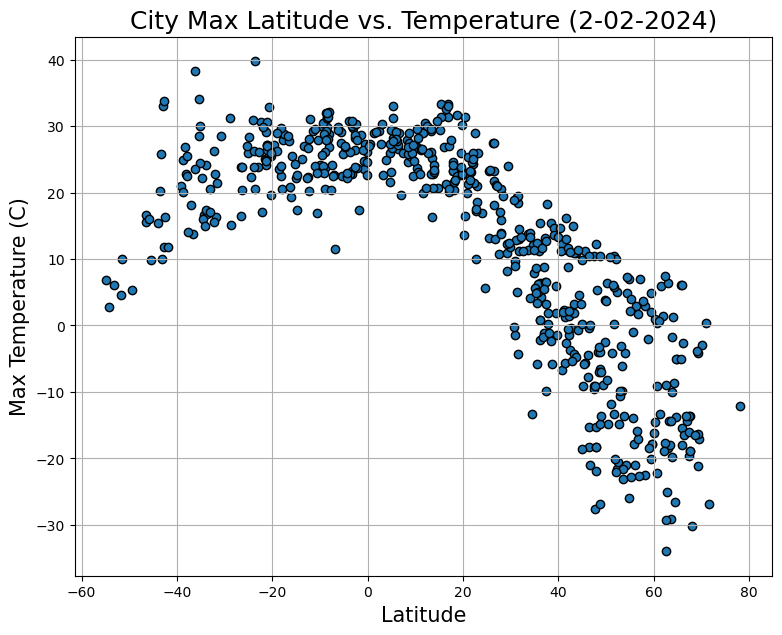

In [15]:

#Setting Date format
city_data_df['Date']=(pd.to_datetime(city_data_df['Date'])).dt.date

# Build scatter plot for latitude vs. temperature
plt.figure(figsize = (9,7))
plt.scatter(city_data_df['Lat'],city_data_df['Max Temp'], edgecolor = 'black')

# Incorporate the other graph properties
date = "{2-02-2024}"
plt.xlabel("Latitude", fontsize = 15)
plt.ylabel("Max Temperature (C)" , fontsize = 15)
plt.title("City Max Latitude vs. Temperature (2-02-2024)" , fontsize = 18)
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()


#### Latitude Vs. Humidity

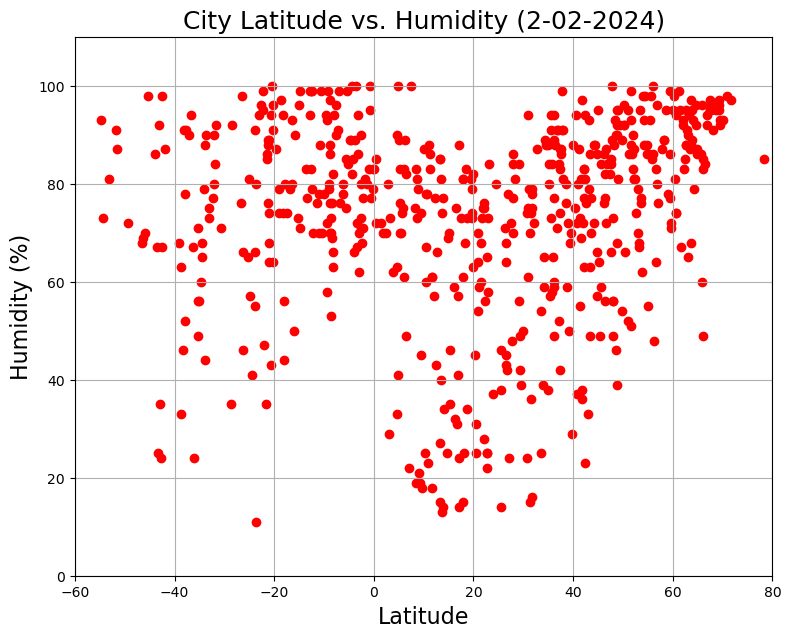

In [17]:
# Build the scatter plots for latitude vs. humidity
plt.figure(figsize = (9,7))
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], marker = 'o', facecolors = 'r')

# Incorporate the other graph properties
plt.xlabel("Latitude", fontsize = 16)
plt.ylabel("Humidity (%)", fontsize = 16)
plt.title("City Latitude vs. Humidity (2-02-2024)", fontsize = 18)
plt.grid()
plt.xlim(-60, 80)
plt.ylim(0, 110)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

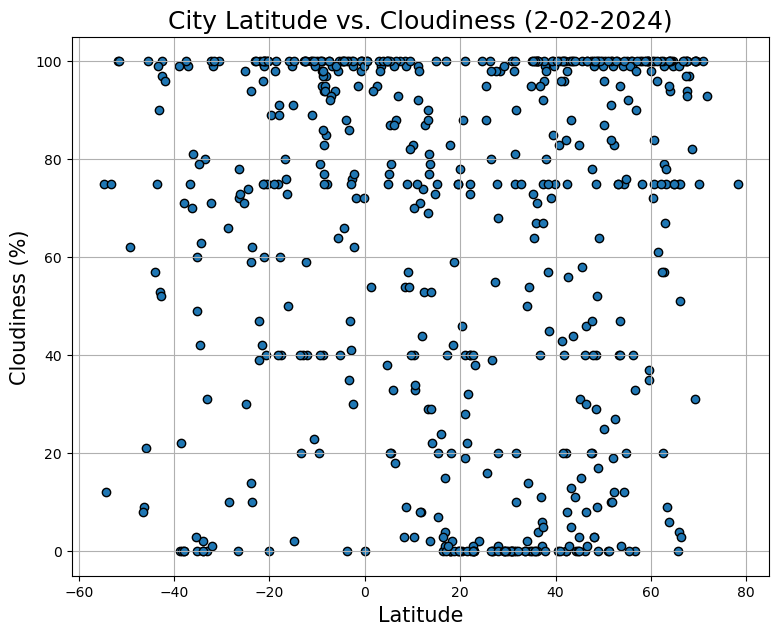

In [18]:
# Build the scatter plots for latitude vs. cloudiness
plt.figure(figsize = (9,7))
plt.scatter(city_data_df['Lat'],city_data_df['Cloudiness'], edgecolor = 'black')

# Incorporate the other graph properties
plt.xlabel("Latitude", fontsize = 15)
plt.ylabel("Cloudiness (%)", fontsize = 15)
plt.title("City Latitude vs. Cloudiness (2-02-2024)", fontsize = 18)
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

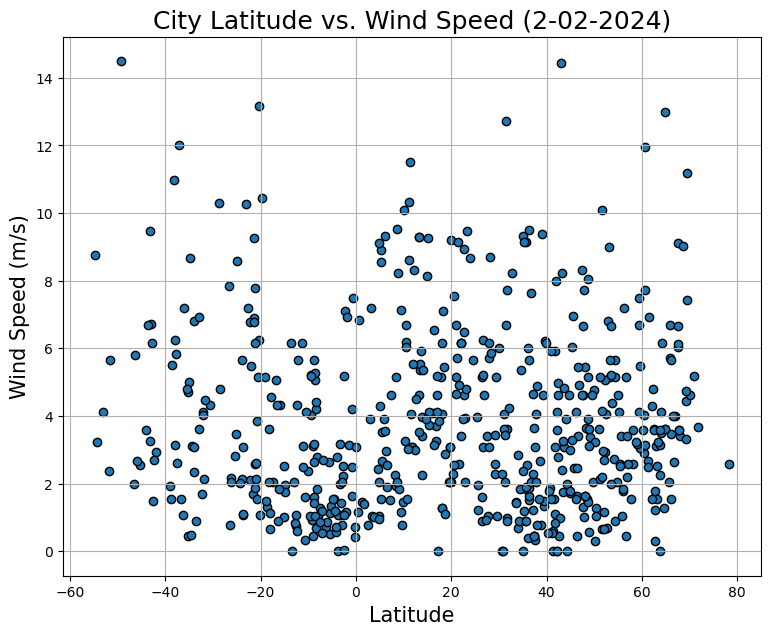

In [20]:
# Build the scatter plots for latitude vs. wind speed
plt.figure(figsize = (9,7))
plt.scatter(city_data_df['Lat'],city_data_df['Wind Speed'], edgecolor = 'black')

# Incorporate the other graph properties
plt.xlabel("Latitude", fontsize = 15)
plt.ylabel("Wind Speed (m/s)", fontsize = 15)
plt.title("City Latitude vs. Wind Speed (2-02-2024)", fontsize = 18)
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [22]:

def linear_regress(dataframe,column_1,column_2):
    
    # Assigning the values to columns 
    x = dataframe[column_1]
    y = dataframe[column_2]
    
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x,y)
    
    # Regression equation
    regress_val = x * slope + intercept
    slope_val = round(slope,2)
    inter_val = round(intercept,2)
    lequation = f"y = {slope_val}x + {inter_val}"
    
    # Plotting
    plt.figure(figsize = (9,7))
    plt.scatter(x, y,linewidth = 3)
    
    # Adding the linear regression line
    plt.plot(x, regress_val,"r-")
    
    # Adding the linear equation formula
    plt.annotate(lequation,(min(x),min(y) + 6),fontsize = 15, color = "red")
    
    # Labels
    plt.xlabel("Latitude", fontsize = 15)
    plt.ylabel(column_2, fontsize = 15)
    
    # Print the r-vlaue
    print(f"The r-value \033[1mis\033[0m: {rvalue}")
    
    plt.show()


In [23]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,anadyr,64.7500,177.4833,-13.72,92,100,13.00,RU,1970-01-01
2,san patricio,28.0170,-97.5169,20.47,86,1,8.70,US,1970-01-01
3,bilibino,68.0546,166.4372,-30.18,91,97,3.42,RU,1970-01-01
4,thunder bay,48.4001,-89.3168,-4.01,93,40,1.54,CA,1970-01-01
6,college,64.8569,-147.8028,-5.01,86,75,3.60,US,1970-01-01


In [24]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,adamstown,-25.0660,-130.1015,25.92,81,98,3.48,PN,1970-01-01
5,margaret river,-33.9500,115.0667,24.16,44,0,6.82,AU,1970-01-01
10,invercargill,-46.4000,168.3500,16.68,69,9,5.81,NZ,1970-01-01
13,vanimo,-2.6741,141.3028,28.25,80,76,2.53,PG,1970-01-01
14,edinburgh of the seven seas,-37.0676,-12.3116,18.14,90,99,12.01,SH,1970-01-01


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.860666697888947


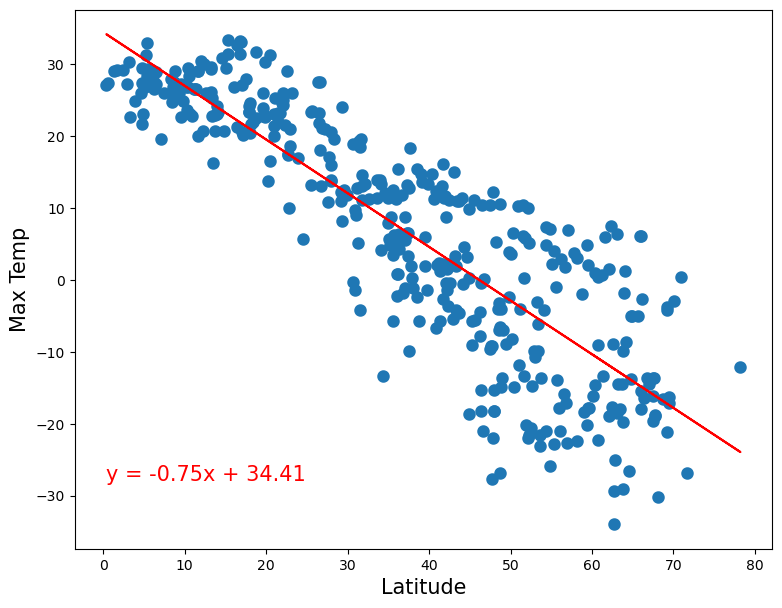

In [25]:
# Linear regression on Northern Hemisphere
linear_regress(northern_hemi_df, "Lat", "Max Temp")

The r-value is: 0.5172660924815101


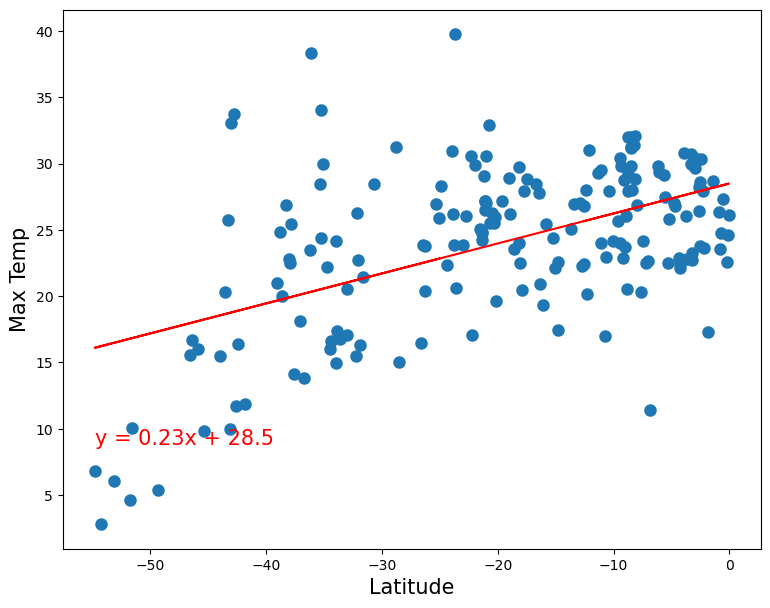

In [26]:
# Linear regression on Southern Hemisphere
linear_regress(southern_hemi_df, "Lat", "Max Temp")

**Discussion about the linear relationship:** The downward trend in the scatterplot for the Northern Hemisphere with a r-value being a negative .86 shows a strong correlation between latitude and maximum temperatures. The regression line shows as the latitude increases the tempatures lowers. The upward trend for the Southern Hemisphere scatter plot shows a positive linear line. However, with the r-value only being .51, this shows a weak correlation, meaning there is not a direct correlation between latitude and maximum temperature. Therefore, it does not necessarily mean as the latitude decreases from the Southern Hemisphere that the tempature could be predicted accurately.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.4614518266570787


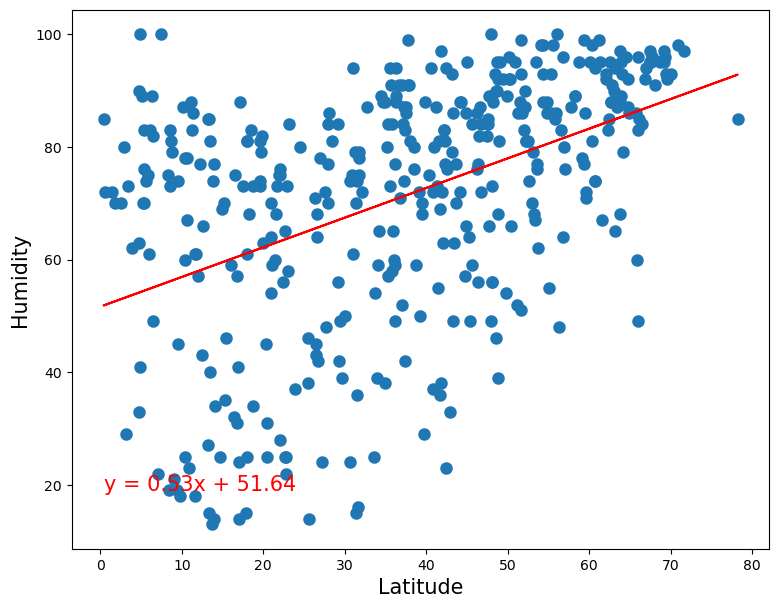

In [27]:
# Northern Hemisphere
linear_regress(northern_hemi_df,"Lat","Humidity")

The r-value is: 0.24463136435678104


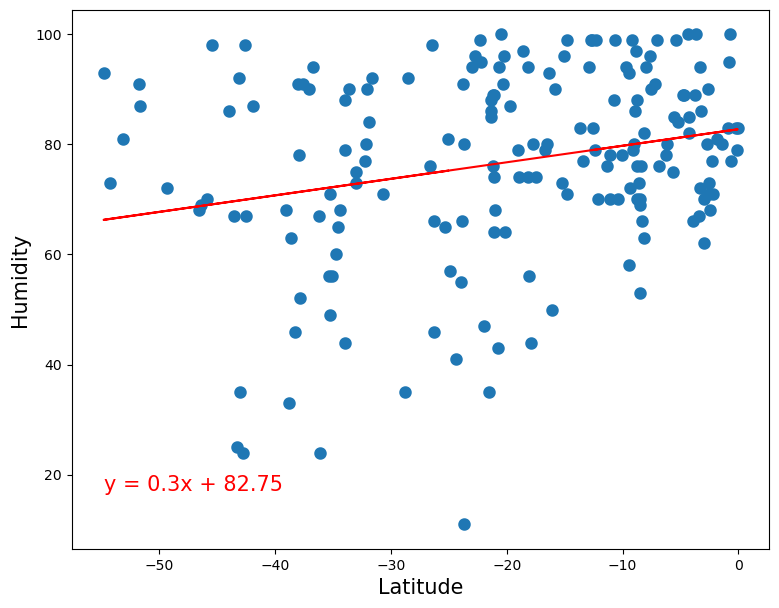

In [29]:
# Southern Hemisphere
linear_regress(southern_hemi_df,"Lat","Humidity")

**Discussion about the linear relationship:** Evaluating the linear line and and r-value there is a moderate correlation between latitude and humidity for the Northern Hemisphere. This shows there is some influence on humidity as the latitude increases. However, the r-value for the Southern Hemisphere shows a weak correlation and it can be determined the latitude has little to no affect on humidity.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.1769636610886464


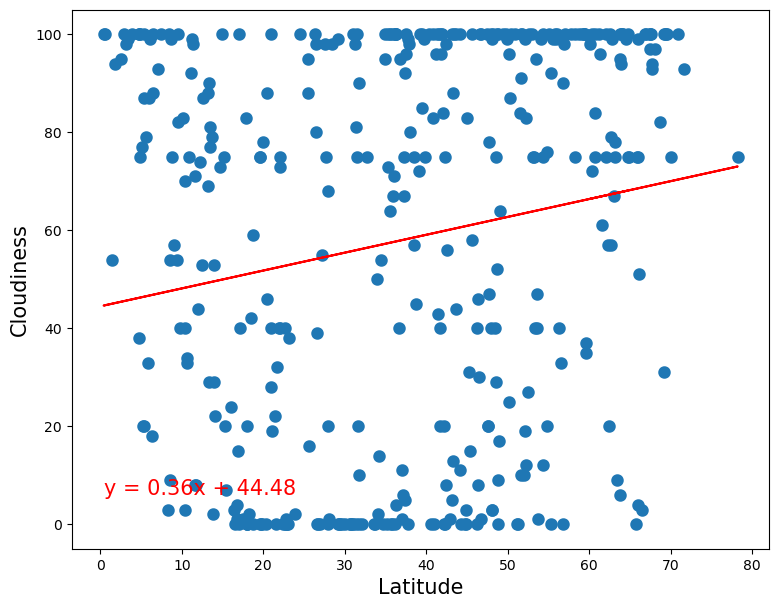

In [32]:
# Northern Hemisphere
linear_regress(northern_hemi_df,"Lat","Cloudiness")

The r-value is: 0.2815421073167484


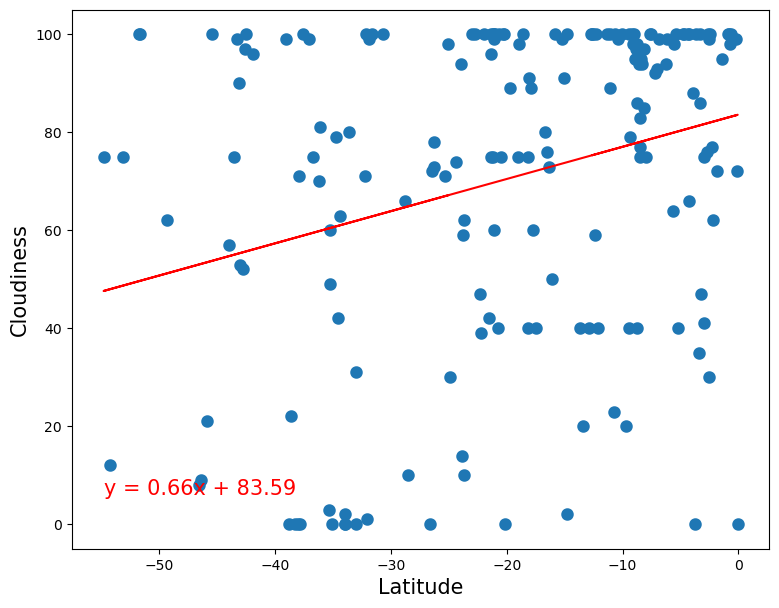

In [33]:
# Southern Hemisphere
linear_regress(southern_hemi_df,"Lat","Cloudiness")

**Discussion about the linear relationship:** Evaluating the linear line and the r-values in both the Northern and Southern Hemisphere in relationship to latitude and cloudiness show that there is a weak correlation between latitude and cloudiness therefore one cannot determine cloudiness based on latitude in both the Northern and Southern Hemisphere.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: -0.06056180827772917


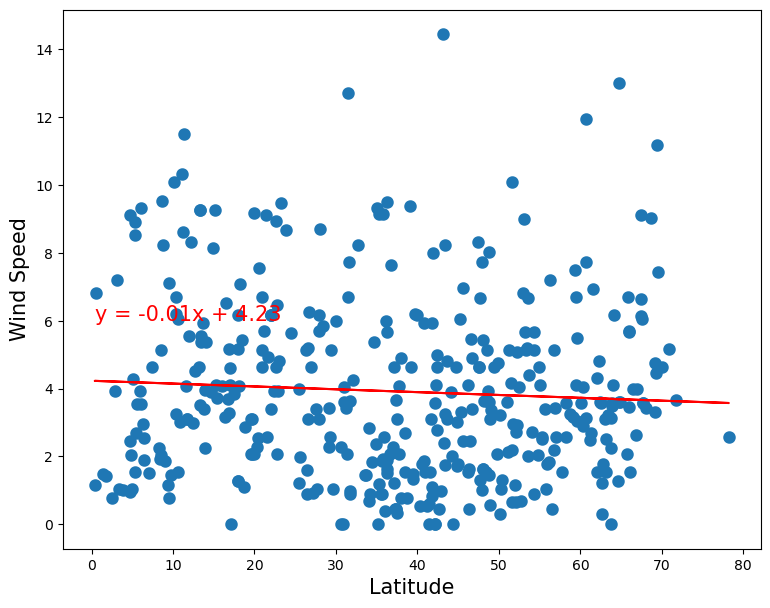

In [34]:
# Northern Hemisphere
linear_regress(northern_hemi_df,"Lat","Wind Speed")

The r-value is: -0.3558636451683753


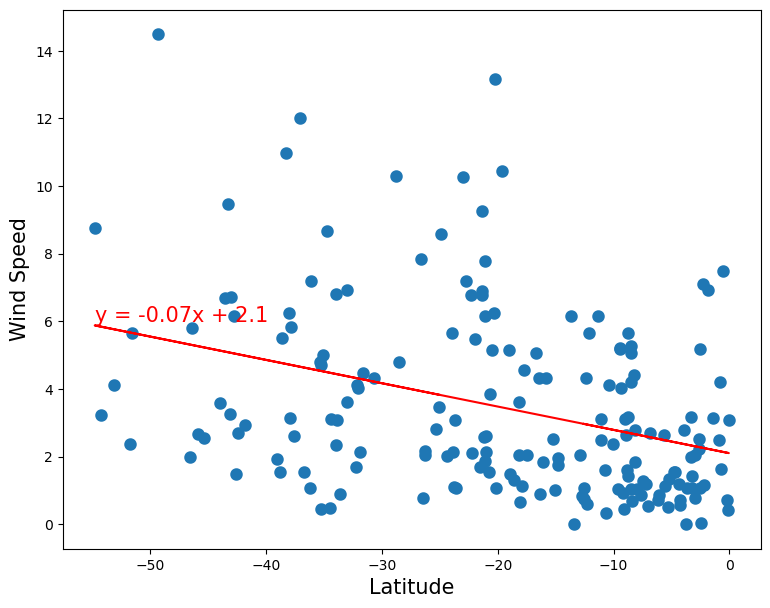

In [35]:
# Southern Hemisphere
linear_regress(southern_hemi_df,"Lat","Wind Speed")

**Discussion about the linear relationship:** In this data comparison both the Northern and Southern Hemisphere show a weak correlation between latitude and wind speed and neither are contigent on the other.